In [1]:
import pandas as pd
import numpy as np
#Load common functions
import ipynb.fs.full.common as common

In [2]:
MML_VARIABLE_ANALYZED = 'POP'
REGION = "DEVELOPED"

In [3]:
df = pd.read_excel(f"data/{REGION}/AnnualTotPopMidYear-20221027061003.xlsx", sheet_name='Data')
#Annual Total Population at Mid-Year (thousands)
df[0:5]

,ISO 3166-1 numeric code,Location,Note,1970,1972,1974,1976,1978,1980,1982,...,2012,2014,2016,2018,2020,2030,2035,2040,2045,2050
0,900,World,NaN,3700578,3851545,4003448,4154288,4304377,4458412,4618776,...,7128177,7298453,7466964,7632819,7795482,8551199,8892702,9210337,9504210,9771823
1,901,More developed regions,a,1009082,1025511,1041700,1056821,1070879,1084244,1097084,...,1243055,1249864,1256576,1263200,1269277,1289937,1295000,1297496,1298349,1298069
2,902,Less developed regions,b,2691496,2826034,2961748,3097467,3233498,3374167,3521693,...,5885122,6048590,6210388,6369620,6526205,7261262,7597702,7912841,8205861,8473754
3,941,Least developed countries,c,308486,323507,338920,355654,373854,393279,413847,...,890423,934192,979388,1025937,1073984,1334196,1474183,1618985,1767059,1916742
4,934,"Less developed regions, excluding least ...",d,2383009,2502528,2622827,2741813,2859643,2980888,3107846,...,4994699,5114397,5231000,5343683,5452221,5927066,6123520,6293857,6438801,6557013


In [4]:
del df['ISO 3166-1 numeric code']
del df['Note']
df.columns = df.columns.astype(str)
df['Location'] = df['Location'].str.strip()


In [5]:
def fix_countries_for_region(df, region=REGION):
    '''Matc h country column name in dataset with MML dict of country names for region.
    Unfortunately, it's a manual job. We know which names are missing according to MML, but we don't how the truth dataset named that country (if exists at all).
    
    '''
    if region == 'DEVELOPED':
        fix_countries_for_developed(df)
    if region == 'LAM':
        fix_countries_for_lam(df)
def fix_countries_for_developed(df):
    common.replace_value_in_column(df,'Location','Tajikistan','Tayikistan')
    common.replace_value_in_column(df,'Location','Lebanon','Libano')
    common.replace_value_in_column(df,'Location','Bosnia and Herzegovina','Bosnia y Herzegovina')
    common.replace_value_in_column(df,'Location','Japan','Japon')
    common.replace_value_in_column(df,'Location','Kyrgyzstan','Kirguistan')
    common.replace_value_in_column(df,'Location', 'Ukraine', 'Ucrania')
    common.replace_value_in_column(df,'Location','Czechia','Republica Checa')
    common.replace_value_in_column(df,'Location','Finland','Finlandia')
    common.replace_value_in_column(df,'Location','Denmark','Dinamarca')
    common.replace_value_in_column(df,'Location','Spain','España')
    common.replace_value_in_column(df,'Location','United States of America','EEUU')
    common.replace_value_in_column(df,'Location','Norway','Noruega')
    common.replace_value_in_column(df,'Location','Belgium','Belgica')
    common.replace_value_in_column(df,'Location','Hungary','Hungria')
    common.replace_value_in_column(df,'Location','Russian Federation','Rusia')
    common.replace_value_in_column(df,'Location','Switzerland','Suiza')
    common.replace_value_in_column(df,'Location','France','Francia')
    common.replace_value_in_column(df,'Location','Poland','Polonia')
    common.replace_value_in_column(df,'Location','Ireland','Irlanda')
    common.replace_value_in_column(df,'Location','Slovenia','Eslovenia')
    common.replace_value_in_column(df,'Location','Greece','Grecia')
    common.replace_value_in_column(df,'Location','Romania','Rumania')
    common.replace_value_in_column(df,'Location','Sweden','Suecia')
    common.replace_value_in_column(df,'Location','Croatia','Croacia')
    common.replace_value_in_column(df,'Location','Netherlands','Paises Bajos')
    common.replace_value_in_column(df,'Location','Latvia','Letonia')
    common.replace_value_in_column(df,'Location','Kazakhstan','Kazajistan')
    common.replace_value_in_column(df,'Location','Lithuania','Lituania')
    common.replace_value_in_column(df,'Location','United Kingdom','Reino Unido')
    common.replace_value_in_column(df,'Location','TFYR Macedonia','Macedonia')
    common.replace_value_in_column(df,'Location','Germany','Alemania')
    common.replace_value_in_column(df,'Location','Italy','Italia')
    common.replace_value_in_column(df,'Location','New Zealand','Nueva Zelanda')
    common.replace_value_in_column(df,'Location','Belarus','Bielorrusia')
    common.replace_value_in_column(df,'Location','Republic of Moldova','Moldavia')
    common.replace_value_in_column(df,'Location','Slovakia','Eslovaquia')
    common.replace_value_in_column(df,'Location','Azerbaijan','Azerbaiyan')
    
def fix_countries_for_lam(df):
    common.replace_value_in_column(df, 'Location', 'Venezuela (Bolivarian Republic of)','Venezuela')
    common.replace_value_in_column(df, 'Location', 'Bolivia (Plurinational State of)','Bolivia')    
    common.replace_value_in_column(df, 'Location', 'Dominican Republic', 'Republica Dominicana')
    common.replace_value_in_column(df, 'Location', 'Trinidad and Tobago', 'Trinidad y Tobago')
    common.replace_value_in_column(df, 'Location', 'Brazil', 'Brasil')

In [6]:
print("Missing countries for region")
print(common.get_missing_countries_for_region(df, 'Location', REGION))
#Actually, they are not missing, they have a different value
fix_countries_for_region(df)
print("Missing countries for region after fix")
print(common.get_missing_countries_for_region(df, 'Location', REGION))

Missing countries for region
{'Eslovenia', 'Letonia', 'Reino Unido', 'Kazajistan', 'Polonia', 'Rumania', 'Libano', 'Nueva Zelanda', 'Macedonia', 'Lituania', 'Tayikistan', 'Francia', 'Bielorrusia', 'Suiza', 'Paises Bajos', 'Moldavia', 'Republica Checa', 'Dinamarca', 'Noruega', 'Rusia', 'Eslovaquia', 'Croacia', 'Azerbaiyan', 'Hungria', 'Ucrania', 'Bosnia y Herzegovina', 'Italia', 'Belgica', 'Japon', 'España', 'Finlandia', 'Grecia', 'EEUU', 'Kirguistan', 'Suecia', 'Alemania', 'Irlanda'}
Missing countries for region after fix
set()


In [7]:
df_truth = common.get_countries_for_region(df, 'Location', REGION)
assert len(df_truth) == len(common.regions[REGION]['countries']), 'MISSING COUNTRIES FOR REGION'

In [8]:
years_filtered = np.arange(1970,2020,2) 
columns_filter = np.append(['Location'],years_filtered)

df_truth = df_truth[columns_filter]
assert 0 == df_truth.isna().sum().sum(), "MISSING VALUES. CONSIDER FILL STRATEGY" #If 0, then we don't have missing values.
assert not (df_truth == 0).any().any(), "CELLS WITH 0" 

Finally, we got our truth dataframe. Now, MML

In [9]:
df_mml = common.get_mml_data(REGION)
df_mml = df_mml[['Year',MML_VARIABLE_ANALYZED]]
df_mml = df_mml[df_mml.Year <= 2020]
# According to truth dataset, population values are expressed in thousands, so 1 in truth is actually 1000.
df_mml[MML_VARIABLE_ANALYZED] = df_mml[MML_VARIABLE_ANALYZED] / 1000 
df_mml[0:3]

,Year,POP
0,1960,946600.0
1,1962,968300.0
2,1964,988500.0


Ok, that was easy. Back to truth df. 
We need to transpose df, get only even years and group by some condition

In [10]:
df_T = df_truth.set_index('Location').T
df_T = df_T.reset_index().rename(columns={"index": "Year"})


df_truth = df_T.astype({'Year': 'int64'})
df_truth['sum'] = df_truth.iloc[:, 1:len(common.regions[REGION]['countries'])+1].sum(axis=1)
df_truth_aggs = df_truth[['Year','sum']]

In [11]:
df = pd.merge(df_mml,df_truth_aggs,on='Year').rename(columns={"POP": "mml_value", "sum":"truth_value"})
df[0:3]

,Year,mml_value,truth_value
0,1970,1038000.0,1059222
1,1972,1050000.0,1077909
2,1974,1062000.0,1096301


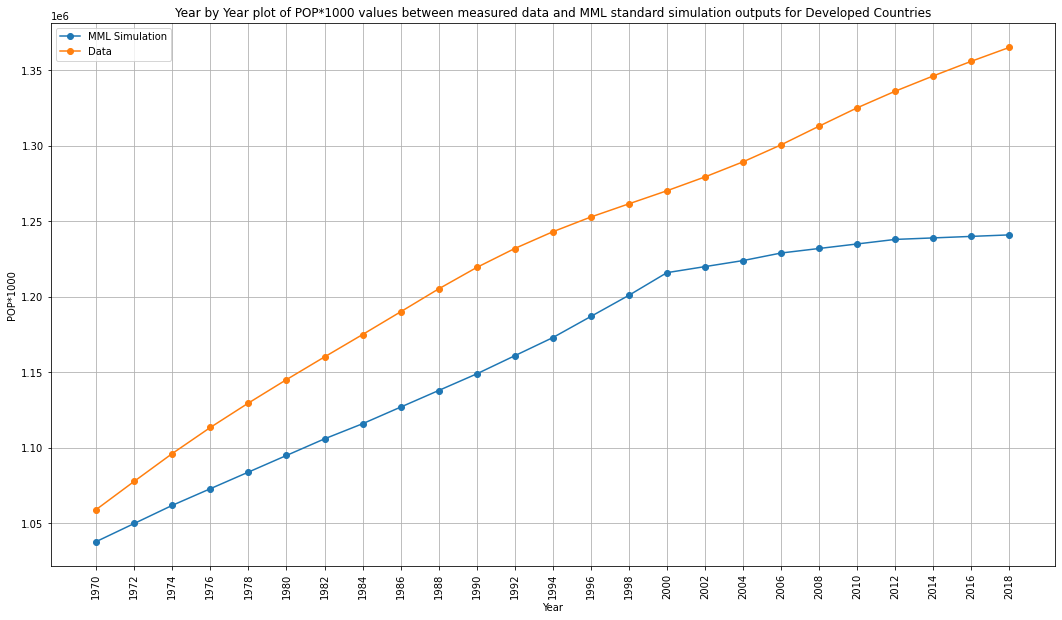

In [12]:

common.compare_mml_vs_truth_line_plot(df, 'Year', 'mml_value', 'truth_value', f"{MML_VARIABLE_ANALYZED}*1000", REGION)

As we see in the graph, from 1988, mml stops growing as the truth continues the original tendence.

### 1970 - 1988

So, let's take only from 1970-1988

Mean seems to be quite accurate in that interval

### Error visualization

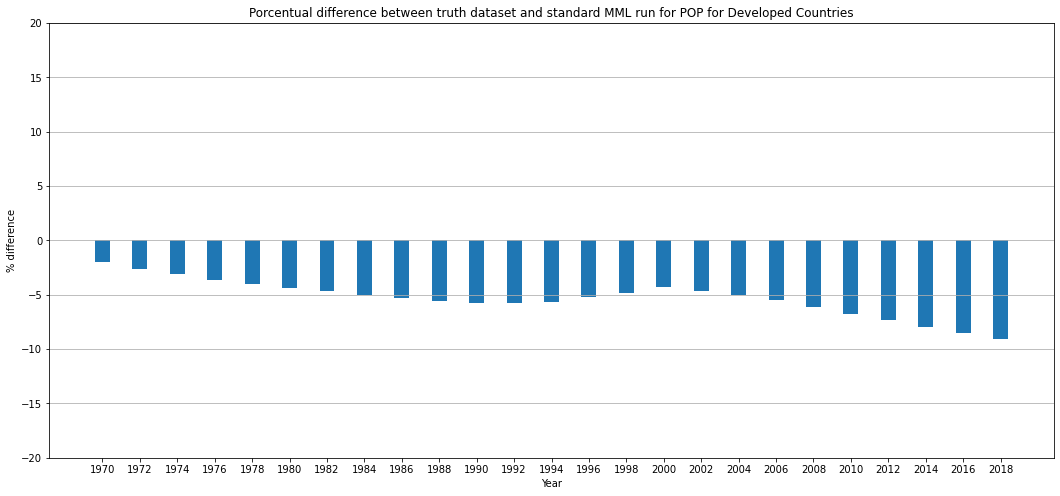

In [13]:
common.compute_porcentual_diff_between_truth_and_mml(df, 'mml_value', 'truth_value')
common.porcentual_diff_plot(df,MML_VARIABLE_ANALYZED, REGION, years_filtered, np.arange(-20,21,5))

In [14]:
common.save_porcentual_diff_to_excel_for_variable(df, MML_VARIABLE_ANALYZED, REGION)